> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# 4.2. Profiling your code easily with cProfile and IPython

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape) < .5) - 1

In [3]:
%%prun -s cumulative -q -l 10 -T prun0
# We profile the cell, sort the report by "cumulative time",
# limit it to 10 lines, and save it to a file "prun0".
n = 10000
iterations = 50
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i,:], bins)[0] for i in range(iterations)])

 
*** Profile printout saved to text file 'prun0'. 


In [4]:
print(open('prun0', 'r').read())

         3262 function calls in 0.062 seconds

   Ordered by: cumulative time
   List reduced from 40 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.062    0.062 {built-in method builtins.exec}
        1    0.000    0.000    0.061    0.061 <string>:4(<module>)
        1    0.000    0.000    0.043    0.043 <string>:8(<listcomp>)
       50    0.003    0.000    0.043    0.001 function_base.py:78(histogram)
       50    0.000    0.000    0.023    0.000 fromnumeric.py:712(sort)
       50    0.022    0.000    0.022    0.000 {method 'sort' of 'numpy.ndarray' objects}
        1    0.005    0.005    0.015    0.015 <ipython-input-2-7b2aa0313928>:1(step)
        1    0.010    0.010    0.010    0.010 {method 'random_sample' of 'mtrand.RandomState' objects}
       50    0.007    0.000    0.009    0.000 index_tricks.py:251(__getitem__)
      100    0.005    0.000    0.005    0.000 function_base.py:1116(diff)


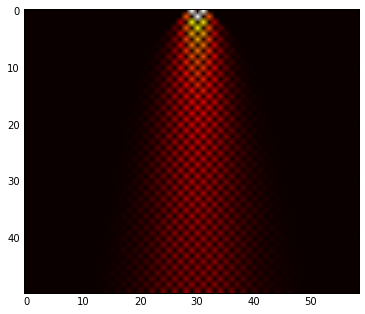

In [5]:
plt.figure(figsize=(6,6));
plt.imshow(y, cmap='hot');

In [6]:
%%prun -s cumulative -q -l 10 -T prun1
n = 10000
iterations = 500
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i,:], bins)[0] for i in range(iterations)])

 
*** Profile printout saved to text file 'prun1'. 


In [7]:
print(open('prun1', 'r').read())

         32512 function calls in 0.452 seconds

   Ordered by: cumulative time
   List reduced from 40 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.452    0.452 {built-in method builtins.exec}
        1    0.004    0.004    0.452    0.452 <string>:2(<module>)
        1    0.076    0.076    0.220    0.220 <ipython-input-2-7b2aa0313928>:1(step)
        1    0.001    0.001    0.179    0.179 <string>:6(<listcomp>)
      500    0.011    0.000    0.178    0.000 function_base.py:78(histogram)
        1    0.144    0.144    0.144    0.144 {method 'random_sample' of 'mtrand.RandomState' objects}
      500    0.001    0.000    0.135    0.000 fromnumeric.py:712(sort)
      500    0.128    0.000    0.128    0.000 {method 'sort' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.047    0.047 fromnumeric.py:2042(cumsum)
        1    0.047    0.047    0.047    0.047 {method 'cumsum' of 'numpy.ndarray'